<a href="https://colab.research.google.com/github/Untick/Selector_ObjDet/blob/Kaz0Inf-Folder/Kaz0Inf/%D0%BF%D1%80%D0%B5%D0%B4%D0%BC%D0%B5%D1%82%D1%8B_1_%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Работа с массивами данных
import numpy as np
# Работа с таблицами
import random
import pandas as pd
# Основные слои
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Lambda, LeakyReLU
# Оптимизаторы для обучения модели
from tensorflow.keras.optimizers import Adam
# Функции-утилиты для работы с каегориальными данными
from tensorflow.keras import utils
# Загрузка сохраненной модели
from tensorflow.keras.models import load_model
# класс для использования Functional API
from tensorflow.keras import Model
# Отрисовка изображения
from tensorflow.keras.preprocessing import image
# Импортируем Keras
from tensorflow import keras
# Импортируем Keras
import keras
# Подключим модуль вычислений на Keras
import keras.backend as K
# Разбиение на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split 
# Функция среднеквадратической ошибки для расчетов вручную
from sklearn.metrics import mean_squared_error
# Загрузка датасетов из облака google
import gdown
# Функции операционной системы
import os
# Работа со временем
import time
# Работа с таблицами
import pandas as pd
from PIL import Image
import cv2
# Отрисовка графиков
import matplotlib.pyplot as plt 
import os #
from google.colab import drive #модуль для работы с google диском 
import time, random
import seaborn as sns
%matplotlib inline

In [4]:
#!unzip -qo "processed%20extended%20dataset.zip" -d /content/drive/MyDrive/processed
#drive.mount('/content/drive/')
/content/selector/processed extended dataset 2
#IMAGE_PATH = '/content/drive/MyDrive/processed/'
#np.save('/content/drive/MyDrive/baseV1/x_dataNorm', x_data)
#x_data = np.load('/content/drive/MyDrive/baseV1/x_dataNorm.npy')
#gdown.download('https://storage.yandexcloud.net/terratraineeship/23_Selector_newbies/datasets/processed%20extended%20dataset.zip', None, quiet=True)

https://storage.yandexcloud.net/terratraineeship/23_Selector_newbies/datasets/processed%20extended%20dataset%202.zip

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
gdown.download('https://storage.yandexcloud.net/terratraineeship/23_Selector_newbies/datasets/processed%20extended%20dataset%202.zip', None, quiet=True)

In [8]:
!unzip -qo "processed%20extended%20dataset%202.zip" -d /content/selector

In [3]:
IMAGE_PATH = '/content/selector/processed extended dataset 2/'

In [11]:
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

In [13]:
data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} изображений одежды')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print('Общий размер базы для обучения:', len(data_labels))

Размер класса dress  business составляет 942 изображений одежды
Размер класса dress casual_ составляет 805 изображений одежды
Размер класса dress homemade_ составляет 975 изображений одежды
Размер класса dress solemn составляет 1004 изображений одежды
Размер класса shirt men составляет 237 изображений одежды
Размер класса shirt women составляет 1033 изображений одежды
Размер класса sportswear men составляет 906 изображений одежды
Размер класса sportswear women составляет 1018 изображений одежды
Размер класса t-shirt men составляет 1069 изображений одежды
Размер класса t-shirt women составляет 1171 изображений одежды
Размер класса trousers men составляет 1780 изображений одежды
Размер класса trousers women составляет 986 изображений одежды
Общий размер базы для обучения: 11926


In [5]:
IMG_WIDTH = 64                           # Ширина изображения
IMG_HEIGHT = 64

In [18]:
data_images = []                          # Пустой список для данных изображений

for file_name in data_files:
    # Открытие и смена размера изображения
    img = Image.open(file_name).resize((IMG_WIDTH, IMG_HEIGHT)).convert('L')
    img_np = np.array(img)                # Перевод в numpy-массив
    data_images.append(img_np)            # Добавление изображения в виде numpy-массива к общему списку

x_data = np.array(data_images)            # Перевод общего списка изображений в numpy-массив
y_data = np.array(data_labels)            # Перевод общего списка меток класса в numpy-массив

print(f'В массив собрано {len(data_images)} фотографий следующей формы: {img_np.shape}')
print(f'Общий массив данных изображений следующей формы: {x_data.shape}')
print(f'Общий массив меток классов следующей формы: {y_data.shape}')

В массив собрано 11926 фотографий следующей формы: (64, 64)
Общий массив данных изображений следующей формы: (11926, 64, 64)
Общий массив меток классов следующей формы: (11926,)


In [19]:
np.save('/content/drive/MyDrive/baseV1/x_data', x_data)
np.save('/content/drive/MyDrive/baseV1/y_data', y_data)

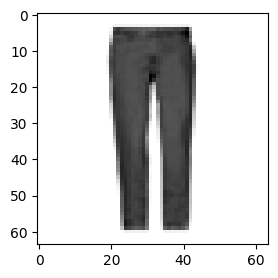

In [30]:

fig, axs = plt.subplots(1, 1, figsize=(25, 3)) #Создаем полотно из 10 графиков

axs.imshow(Image.fromarray(x_data[10000]),cmap='gray') #Конвертируем изображение в черно-белый формат и отображаем i-ым графиков

plt.show() #Показываем изображения

In [7]:
x_data = np.load('/content/drive/MyDrive/baseV1/x_data.npy')
y_data = np.load('/content/drive/MyDrive/baseV1/y_data.npy')

In [8]:
x_data = x_data.reshape(-1,IMG_HEIGHT,IMG_WIDTH,1)


In [9]:
x_data = x_data.astype('float32')
x_data /= 255

In [10]:
x_data.shape

(11926, 64, 64, 1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, # набор параметров
                                                    y_data, # набор меток классов
                                                    test_size=0.2, # процент в тестовую
                                                    shuffle=True, #  перемешивание
                                                    random_state=3) # воспроизводимость

In [12]:
x_train.shape

(9540, 64, 64, 1)

In [13]:
def baseAutoencoder(shape=(112,80,1)): # зададим функцию создания базового автокодировщика
    img_input = Input((shape)) # задаём входные размеры

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input) # входные данные передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # затем пропускаем через слой нормализации данных 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # далее снова слой двумерной свёртки
    x = BatchNormalization()(x) # и еще слой нормализации данных
    x = MaxPooling2D()(x) # передаём на слой подвыборки, снижающий размерность поступивших на него данных

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # пропускаем через слой нормализации данных 
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)  # далее снова слой двумерной свёртки
    x = BatchNormalization()(x) # и еще слой нормализации данных
    z = MaxPooling2D()(x) # передаём на слой подвыборки
    

    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(z) # слой разжимает данные(с 28*20 на 56*40)
    x = BatchNormalization()(x) # слой нормализации данных
    
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) # ещё слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных
    # Сжатие MaxPooling2D не применяем

    x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(x) # слой разжимает данные(с 56*40 на 112*80)
    x = BatchNormalization()(x) # слой нормализации данных
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # передаем на слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) # ещё слой двумерной свёртки
    x = BatchNormalization()(x) # слой нормализации данных

    # Финальный слой двумерной свертки, выдающий итоговое изображение
    x = Conv2D(shape[-1], (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x) # указываем модель, с оригинальным изображением на входе в сеть и сжатым-разжатым на выходе из сети
    model.compile(optimizer=Adam(lr=0.0001),
                  loss='mean_squared_error') # компилируем модель с оптимайзером Адам и среднеквадратичной ошибкой

    return model # функция вернёт заданную модель

In [14]:
def plotImages(xTrain, pred, shape=(112, 80)): # создадим функцию для вывода изображений как картинок
  n = 5  # количество картинок, которые хотим показать
  plt.figure(figsize=(14, 7)) # указываем размеры фигуры
  for i in range(n): # для каждой картинки из n(5)
      index = np.random.randint(0, pred.shape[0]) # startIndex - начиная с какого индекса хотим заплотить картинки
      # Показываем картинки из тестового набора
      ax = plt.subplot(2, n, i + 1) # выведем область рисования Axes
      plt.imshow(xTrain[index].reshape(shape)) # отрисуем правильные картинки в размере 112*80      
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y

      # Показываем восстановленные картинки
      ax = plt.subplot(2, n, i + 1 + n) # выведем область рисования Axes 
      plt.imshow(pred[index].reshape(shape)) # отрисуем обработанные сеткой картинки в размере 112*80     
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y
  plt.show()

In [15]:
model = baseAutoencoder((64,64,1)) # создаем автокодировщик

In [ ]:
model.summary()

In [16]:
history = model.fit(x_train, x_train, epochs=100, batch_size=128, validation_data = (x_test, x_test))

Epoch 1/100
75/75 [==============================] - 28s 123ms/step - loss: 0.0210 - val_loss: 0.1289
Epoch 2/100
75/75 [==============================] - 8s 101ms/step - loss: 0.0054 - val_loss: 0.1256
Epoch 3/100
75/75 [==============================] - 8s 102ms/step - loss: 0.0044 - val_loss: 0.0844
Epoch 4/100
75/75 [==============================] - 8s 104ms/step - loss: 0.0034 - val_loss: 0.0688
Epoch 5/100
75/75 [==============================] - 8s 104ms/step - loss: 0.0029 - val_loss: 0.0286
Epoch 6/100
75/75 [==============================] - 8s 107ms/step - loss: 0.0025 - val_loss: 0.0254
Epoch 7/100
75/75 [==============================] - 8s 108ms/step - loss: 0.0024 - val_loss: 0.0058
Epoch 8/100
75/75 [==============================] - 8s 107ms/step - loss: 0.0023 - val_loss: 0.0045
Epoch 9/100
75/75 [==============================] - 8s 109ms/step - loss: 0.0022 - val_loss: 0.0031
Epoch 10/100
75/75 [==============================] - 8s 108ms/step - loss: 0.0019 - val_l

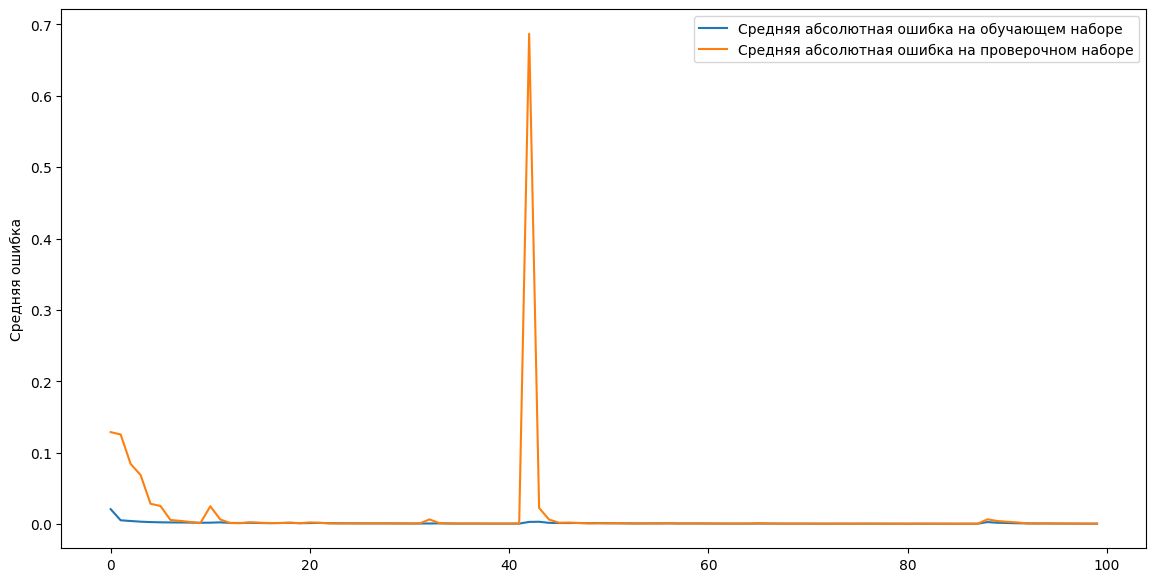

In [22]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [23]:
predTest = model.predict(x_test) # Получаем результат работы модели на тестовой выборке
predTest = predTest * 255 # представляем в виде значений от 0 до 255
predTest = predTest.astype('uint8') # устанавливаем 8битовый тип

75/75 [==============================] - 1s 8ms/step


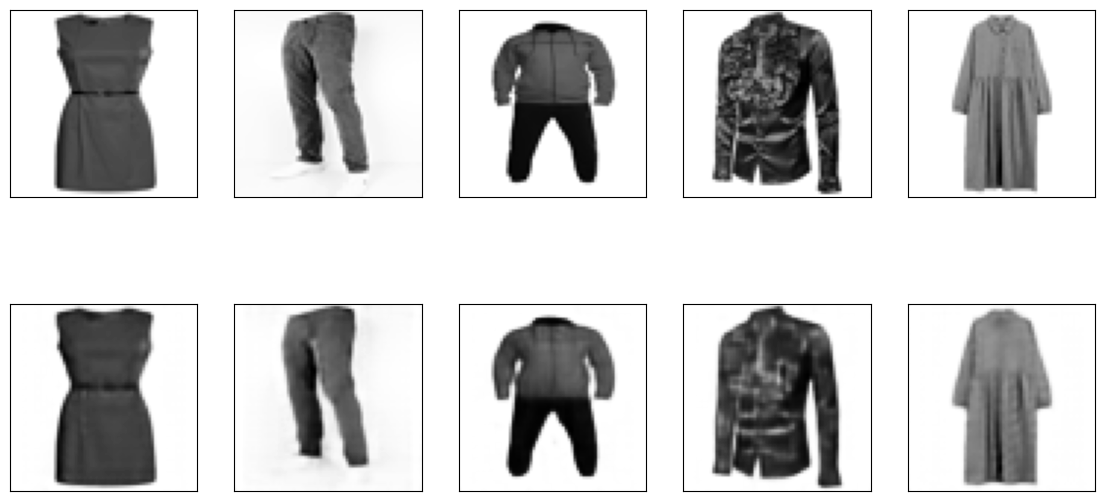

In [24]:
plotImages(x_test, predTest, shape=(64,64))

In [25]:
predTrain = model.predict(x_train) # Получаем результат работы модели на обучающей выборке
predTrain = predTrain * 255 # представляем в виде значений от 0 до 255
predTrain = predTrain.astype('uint8') # устанавливаем 8битовый тип

299/299 [==============================] - 2s 8ms/step


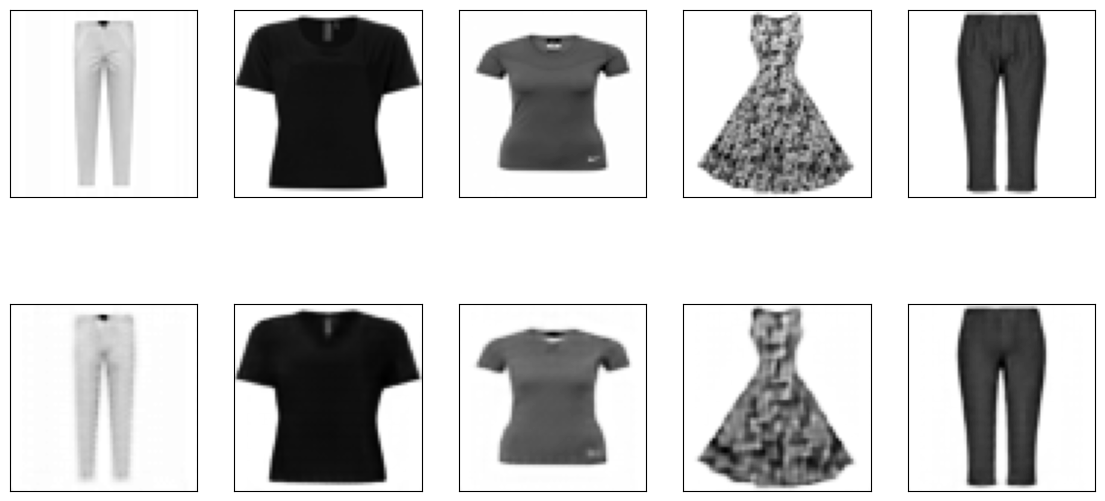

In [26]:
plotImages(x_train, predTrain, shape=(64,64))

In [27]:
# Функция для расчета mse
def getMSE(x1, x2): # создадим функцию среднеквадратичной ошибки
  x1 = x1.flatten() # сплющиваем в одномерный вектор
  x2 = x2.flatten() # сплющиваем в одномерный вектор
  delta = x1 - x2 # находим разницу
  return sum(delta ** 2) / len(delta) # и возвращаем сумму квадратов разницы, делённую на длину разницы

In [28]:
err1 = [getMSE(x_train[i], predTrain[i] / 255) for i in range(len(predTrain))]# Возьмем среднеквадратичную ошибку от правильной картинки и восстановленной (обучающая выборка)
err2 = [getMSE(x_test[i], predTest[i] / 255) for i in range(len(predTest))]# Возьмем среднеквадратичную ошибку от правильной картинки и восстановленной (тестовая выборка)
print("Средняя ошибка на обучающем наборе :", sum(err1) / x_train.shape[0]) # Отобразим ошибку на обучающей выборке
print("Средняя ошибка на тестовом наборе :", sum(err2) /x_test.shape[0] ) # Отобразим ошибку на тестовой выборке

Средняя ошибка на обучающем наборе : 0.0006421802675626426
Средняя ошибка на тестовом наборе : 0.0006344337970592558


In [29]:
model.save_weights('/content/drive/MyDrive/baseV1/modelF.h5') 